In [ ]:
!git clone https://github.com/serbengut/machine_learning_JGG

Cloning into 'machine_learning_JGG'...
remote: Enumerating objects: 17748, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 17748 (delta 21), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17748/17748), 514.90 MiB | 23.55 MiB/s, done.
Resolving deltas: 100% (518/518), done.
Updating files: 100% (16952/16952), done.


In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
data_ads = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/ads/Advertising.csv")

In [4]:
data_ads.head() # esta dataset representa los gastos en publicidad en miles de euros/día en tv, radio y periódico y las ventas finales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
len(data_ads)

200

In [ ]:
##### ¿existe CORRELACIÓN?

In [7]:
import numpy as np


In [8]:
# aplicamos fórmula de Pearson
# numerador solo de la tv
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))*(data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [10]:
data_ads["corr1"] = (data_ads["TV"]-np.mean(data_ads["TV"]))**2

In [11]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [12]:
data_ads["corr2"] = (data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

In [13]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [18]:
corr_pearson = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))


In [19]:
corr_pearson

0.782224424861606

In [ ]:
# da una correlación positiva y cerca de uno. entonces, cuanto más se gasta en televisión, incrementan las ventas. Entonces, se recomienda

In [ ]:
# vamos a crear una función que nos calcule las correlaciones entre dos variables:

In [26]:
# paso tres valores: dataframe, variable 1 y variable 2 para ver si están relacionadas
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))*(df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_pearson = sum(df["corrn"]) / np.sqrt(sum(df["corr1"])*sum(df["corr2"]))
    return corr_pearson

In [27]:
corr_coeff(data_ads,"TV","Sales")

0.782224424861606

In [28]:
corr_coeff(data_ads,"Radio","Sales") # para radio no compensa tanto

0.576222574571055

In [29]:
corr_coeff(data_ads,"Newspaper","Sales") # para periódico no compensa

0.22829902637616534

In [32]:
cols = data_ads.columns.values

In [33]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [36]:
# saco todos los coef de correlacion entre todas las columnas:
for x in cols:
    for y in cols:
        print(x + " - " + y + " : " + str(corr_coeff(data_ads, x, y)))

TV - TV : 1.0
TV - Radio : 0.05480866446583006
TV - Newspaper : 0.056647874965056993
TV - Sales : 0.782224424861606
Radio - TV : 0.05480866446583006
Radio - Radio : 1.0
Radio - Newspaper : 0.35410375076117545
Radio - Sales : 0.576222574571055
Newspaper - TV : 0.056647874965056993
Newspaper - Radio : 0.35410375076117545
Newspaper - Newspaper : 1.0
Newspaper - Sales : 0.22829902637616534
Sales - TV : 0.782224424861606
Sales - Radio : 0.576222574571055
Sales - Newspaper : 0.22829902637616534
Sales - Sales : 1.0


In [ ]:
# arriba vemos lo siguiente: TV - Radio y Radio - TV son iguales. y así con todas las variables.
# de los tres medios de comunicación, la TV tiene mayor correlación con las ventas

In [ ]:
# también podemos representarlo gráficamente:

In [37]:
import matplotlib.pyplot as plt

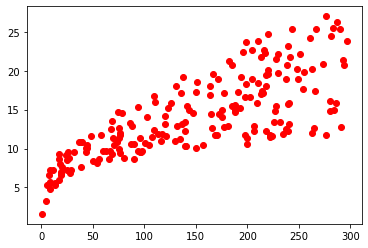

In [38]:
plt.plot(data_ads["TV"], data_ads["Sales"],"ro")
plt.title("Gasto TV vs Venta Producto")

Text(0.5, 1.0, 'Gasto Radio vs Venta Producto')

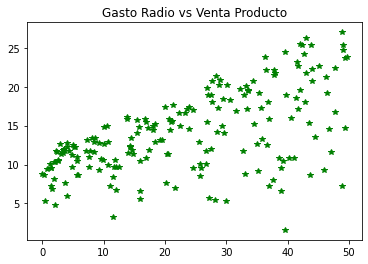

In [44]:
plt.plot(data_ads["Radio"], data_ads["Sales"],"g*")
plt.title("Gasto Radio vs Venta Producto")

Text(0.5, 1.0, 'Gasto Periódico vs Venta Producto')

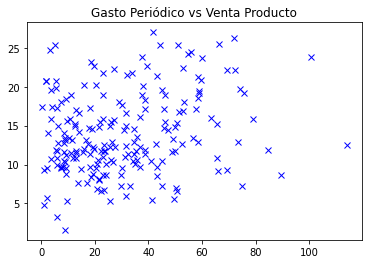

In [43]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"],"bx")
plt.title("Gasto Periódico vs Venta Producto")

In [ ]:
# podemos calcular la correlación directamente en python

In [46]:
data_ads = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


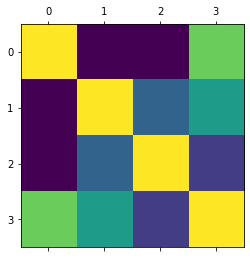

In [47]:
plt.matshow(data_ads.corr())